In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, log_loss, confusion_matrix, precision_score, recall_score
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import binarize
import math

#### Seasonal Exponential Smoothing (SES) Model:

The model used in the example code is called the Seasonal Exponential Smoothing (SES) model. It is a type of time series forecasting model that is used for forecasting data that exhibit seasonality and trend.

SES models are particularly useful for short-term forecasting, where the patterns in the data are relatively stable over time. They can also handle missing data and outliers, making them robust to noise in the data.

However, SES models have some limitations. They may not work well for long-term forecasting, where the patterns in the data may change over time. Additionally, they may not be suitable for data with complex patterns or non-linear trends. In such cases, more advanced forecasting models such as ARIMA, Prophet, or deep learning models may be more appropriate.

In [12]:
import warnings
warnings.filterwarnings('ignore')

In [13]:
df= pd.read_csv('Final_Data1.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date/Time                    1461 non-null   object 
 1   Air Quality Index            1461 non-null   float64
 2   Carbon Monoxide              1461 non-null   float64
 3   Hydrogen Sulphide            1448 non-null   float64
 4   Methane                      1459 non-null   float64
 5   Nitric Oxide                 1461 non-null   float64
 6   Nitrogen Dioxide             1461 non-null   float64
 7   Non-methane Hydrocarbons     1455 non-null   float64
 8   Outdoor Air Temperature      1461 non-null   float64
 9   Ozone                        1461 non-null   float64
 10  PM10 Mass                    412 non-null    float64
 11  PM2.5 Mass                   1461 non-null   float64
 12  Relative Humidity            1452 non-null   float64
 13  Std. Dev. of Wind 

In [15]:
df['Date/Time'].head()

0    2015-01-01
1    2015-01-02
2    2015-01-03
3    2015-01-04
4    2015-01-05
Name: Date/Time, dtype: object

#### Seasonality 
The seasonal exponential smoothing model used in the code takes into account seasonality. The seasonal parameter is set to 'add', which means that the model assumes that there is an additive seasonality in the data. The seasonal_periods parameter is set to 365, which indicates that the seasonality is yearly (since there are 365 days in a year).

By fitting the seasonal exponential smoothing model to the training data, the model estimates the level, trend, and seasonality components of the time series. It then uses these components to make predictions for the validation set and the future periods.

RMSE: 0.8861397461695634
MAPE: 18.721648778492536


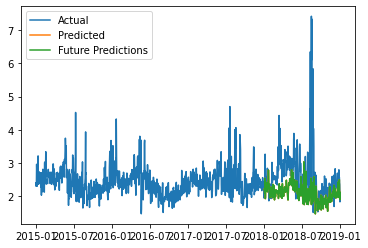

In [16]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# load data from csv
df = pd.read_csv('Final_Data.csv')

# convert date column to datetime format and set it as the index
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
df.set_index('Date/Time', inplace=True)

# split data into training and validation sets
train_data = df.loc['2012-01-01':'2017-12-31']
val_data = df.loc['2018-01-01':'2018-12-31']

# fit seasonal exponential smoothing model to training data
model = ExponentialSmoothing(train_data['Air Quality Index'], seasonal='add', seasonal_periods=365).fit()

# make predictions for validation set
predictions = model.forecast(len(val_data))

# evaluate model performance on validation set
rmse = np.sqrt(((val_data['Air Quality Index'] - predictions) ** 2).mean())
mape = np.mean(np.abs((val_data['Air Quality Index'] - predictions) / val_data['Air Quality Index'])) * 100

print('RMSE:', rmse)
print('MAPE:', mape)

# make predictions for future pollution levels
future_predictions = model.forecast(365)

# plot the predictions and actual values
import matplotlib.pyplot as plt

plt.plot(df['Air Quality Index'], label='Actual')
plt.plot(predictions, label='Predicted')
plt.plot(future_predictions, label='Future Predictions')
plt.legend()
plt.show()


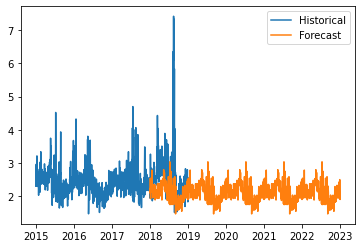

In [17]:


# make predictions for next 5 years
forecast = model.forecast(steps=1825)

# plot the forecasted pollution levels
import matplotlib.pyplot as plt

plt.plot(df['Air Quality Index'], label='Historical')
plt.plot(forecast, label='Forecast')
plt.legend()
plt.show()


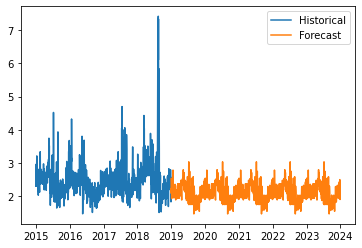

In [18]:
# make predictions for next 5 years
forecast = model.forecast(steps=1825)

# plot the forecasted pollution levels
import matplotlib.pyplot as plt

plt.plot(df['Air Quality Index'], label='Historical')
plt.plot(pd.date_range(start='2019-01-01', periods=1825, freq='D'), forecast, label='Forecast')
plt.legend()
plt.show()


In [19]:
# make predictions for the first week of January 2019
start_date = '2023-03-31'
end_date = '2023-04-07'
forecast = model.predict(start=pd.to_datetime(start_date), end=pd.to_datetime(end_date))

# print the predicted AQI values for the week
print(forecast)


2023-03-31    2.056393
2023-04-01    2.191806
2023-04-02    2.161608
2023-04-03    2.005042
2023-04-04    2.209401
2023-04-05    2.200193
2023-04-06    2.169691
2023-04-07    2.286969
Freq: D, dtype: float64
